In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dt=pd.read_csv("C:\\Users\\hp\\Documents\\Python\\titanic.csv")
dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [17]:
dt.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


sns.countplot(x='Survived', hue= "Sex", data=dt)

In [18]:
dt.isnull()[:10]
dt.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

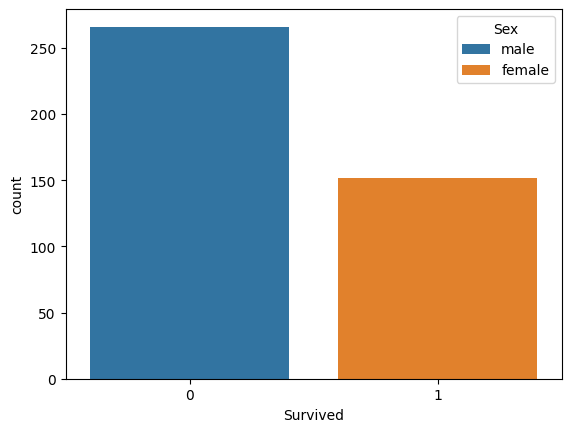

In [19]:
sns.countplot(x='Survived',hue="Sex", data=dt)
plt.show()

In [20]:
dt.drop('Cabin',axis=1,inplace=True)

In [21]:
dt.dropna(inplace=True)
dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [22]:
sex=pd.get_dummies(dt['Sex'],drop_first=True,dtype=int)
sex.head()

,male
0,1
1,0
2,1
3,1
4,0


In [23]:
embark=pd.get_dummies(dt['Embarked'],drop_first=True,dtype=int)
embark.head()

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


drop_first is used so that we do not get multiple col 


In [24]:
pcl=pd.get_dummies(dt['Pclass'],drop_first=True,dtype=int)
pcl.head()

,2,3
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1


logistic regression is for binary

In [25]:
data=pd.concat([dt,sex,pcl,embark],axis=1)
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,2,3,Q,S
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,0,1,1,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1,0,1
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0,1,0
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1,0,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1,0,1


In [26]:
dt=dt.drop(['Sex','Embarked','Pclass','Name','Ticket'],axis=1)
dt.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare
0,892,0,34.5,0,0,7.8292
1,893,1,47.0,1,0,7.0000
2,894,0,62.0,0,0,9.6875
3,895,0,27.0,0,0,8.6625
4,896,1,22.0,1,1,12.2875


In [27]:
X=dt.drop('Survived',axis=1)
y=dt['Survived']
print(X.head())
print(y.head())
X.rename(columns={2:'Pclass_2',3:'Pclass_3'},inplace=True)
y.value_counts()
print('Survived:' in X.columns)
import pandas as pd
corr=pd.concat([X,y],axis=1).corr()
print(corr['Survived'].sort_values(ascending=False))
X=X.drop(['male'],axis=1)



   PassengerId   Age  SibSp  Parch     Fare
0          892  34.5      0      0   7.8292
1          893  47.0      1      0   7.0000
2          894  62.0      0      0   9.6875
3          895  27.0      0      0   8.6625
4          896  22.0      1      1  12.2875
0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64
False
Survived       1.000000
Fare           0.192672
Parch          0.163710
SibSp          0.075450
Age            0.005104
PassengerId   -0.023061
Name: Survived, dtype: float64


KeyError: "['male'] not found in axis"

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
print(X.train.equals(X_test))
print(y_train.equals(y_test))
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
